In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

In [2]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
200/200 [==============================] - 1s 1ms/step - loss: 0.4647 - accuracy: 0.7812
Epoch 2/5
200/200 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8363
Epoch 3/5
200/200 [==============================] - 0s 953us/step - loss: 0.3676 - accuracy: 0.8397
Epoch 4/5
200/200 [==============================] - 0s 947us/step - loss: 0.3625 - accuracy: 0.8407
Epoch 5/5
200/200 [==============================] - 0s 921us/step - loss: 0.3599 - accuracy: 0.8411


In [4]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

1250/1250 [==============================] - 1s 740us/step


In [5]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [6]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

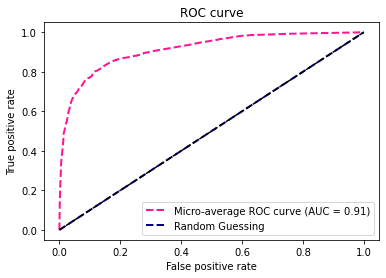

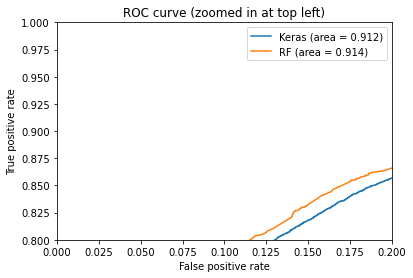

In [7]:
import matplotlib.pyplot as plt


plt.figure(1)
plt.plot(fpr_rf, tpr_rf, color='deeppink', lw=2, linestyle='--', label='Micro-average ROC curve (AUC = {0:.2f})'.format(auc_keras))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

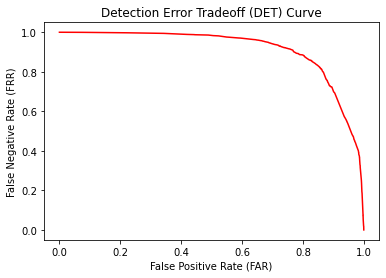

In [10]:
# Compute the false positive rate (fpr) and false negative rate (fnr)
fpr =  tpr_rf
fnr =  1-fpr_rf

# Plot the DET curve
plt.plot(fpr, fnr, color='red',linestyle='-')
plt.xlabel('False Positive Rate (FAR)')
plt.ylabel('False Negative Rate (FRR)')
plt.title('Detection Error Tradeoff (DET) Curve')
plt.show()

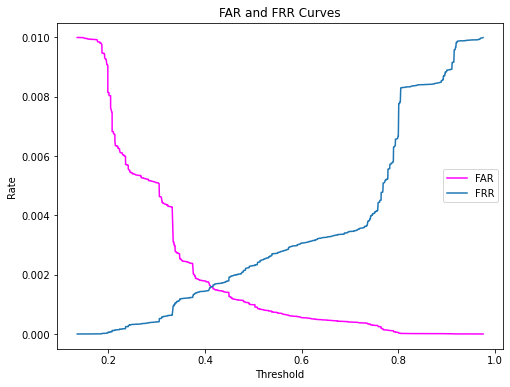

In [26]:
far=fpr_rf
frr=1-tpr_rf

# Plot FAR and FRR curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds_rf, far/100,color="magenta",linestyle="-", label='FAR')
plt.plot(thresholds_rf, frr/100,linestyle="-", label='FRR')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FAR and FRR Curves')
plt.legend()


In [46]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, n_features=20, n_informative=3, n_redundant=0, n_classes=n_classes,
    n_clusters_per_class=2)
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
400/400 [==============================] - 2s 1ms/step - loss: 0.8056 - accuracy: 0.6049
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7469
Epoch 3/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7746
Epoch 4/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7857
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7934
Epoch 6/10
400/400 [==============================] - 0s 909us/step - loss: 0.4952 - accuracy: 0.7997
Epoch 7/10
400/400 [==============================] - 0s 948us/step - loss: 0.4814 - accuracy: 0.8071
Epoch 8/10
400/400 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.8124
Epoch 9/10
400/400 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8166
Epoch 10/10
400/400 [==============================] - 0s 907us/step - loss: 0.4529 - accuracy: 

In [11]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

N_SAMPLES = 1000

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

X, y = make_classification(
    n_samples=N_SAMPLES, n_features=2, n_redundant=0, n_informative=2,
    random_state=1, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.4, random_state=0)

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    plot_roc_curve(clf, X_test, y_test, ax=ax_roc, name=name)
    plot_det_curve(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

NameError: name 'y_score' is not defined

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

/Users/stellafazioli/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


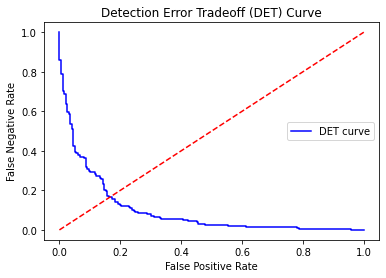

Equal Error Rate (EER): 0.9593908629441624


In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

# Create a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, random_state=1, n_clusters_per_class=2)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train a classifier (e.g., Linear SVM)
clf = make_pipeline(StandardScaler(), LinearSVC(C=0.025))
clf.fit(X_train, y_train)

# Obtain the predicted probabilities for the positive class
y_prob = clf.decision_function(X_test)

# Calculate the false positive rate (FPR) and false negative rate (FNR)
fpr, tpr, _ = roc_curve(y_test, y_prob)
fnr = 1 - tpr

# Calculate equal error rate (EER)
eer = fpr[fnr.argmin()]

# Plot DET curve
plt.plot(fpr, fnr, color='blue', label='DET curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('Detection Error Tradeoff (DET) Curve')
plt.legend()
plt.show()

# Print EER
print("Equal Error Rate (EER):", eer)


In [16]:

import numpy as np
plt.plot(np.log(far), np.log(frr), color='blue', label='DET curve')
plt.xlabel('False Acceptance Rate (FAR) (log scale)')
plt.ylabel('False Rejection Rate (FRR) (log scale)')
plt.title('Detection Error Tradeoff (DET) Curve')
plt.legend()
plt.show()

NameError: name 'far' is not defined

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025, dual="auto")),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

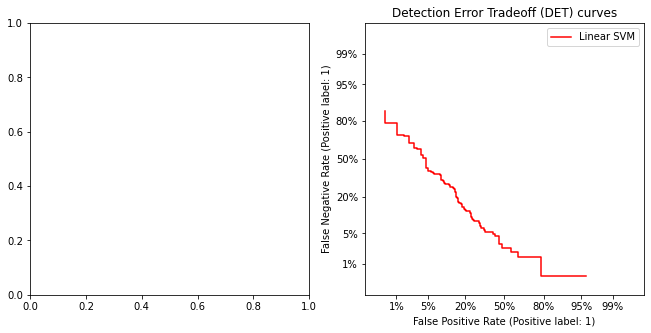

In [18]:
import matplotlib.pyplot as plt

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))
cl_=[]
names=[]
for name, clf in classifiers.items():
    cl_.append(clf)
    names.append(name)
    clf.fit(X_train, y_train)

    #RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
#    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det,color="green", name=name)
    
cl_[0].fit(X_train, y_train)

   
DetCurveDisplay.from_estimator(cl_[0], X_test, y_test, ax=ax_det,color="red", name=names[0])

#ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

#ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="")

plt.legend()
plt.show()

In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import DetCurveDisplay
from sklearn.model_selection import train_test_split

# Train the RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

# Predict the probabilities for the positive class
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Plot the DET curve
plt.figure(figsize=(8, 6))
DetCurveDisplay(rf, X_test, y_test, name='Random Forest')
plt.xlabel('False Accept Rate (FAR)')
plt.ylabel('False Reject Rate (FRR)')
plt.title('Detection Error Tradeoff (DET) Curve')
plt.grid(True)
plt.show()




TypeError: __init__() got an unexpected keyword argument 'name'

<Figure size 576x432 with 0 Axes>

/Users/stellafazioli/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


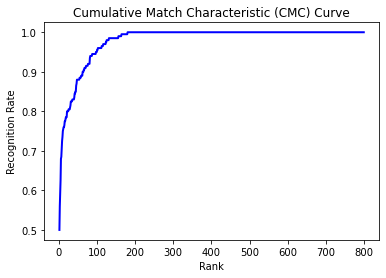

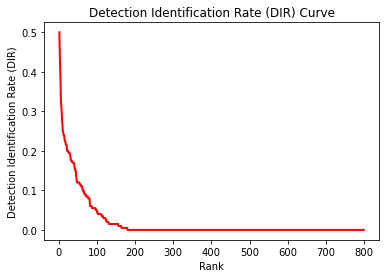

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Generate a multi-class classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2,
                           n_classes=2, n_clusters_per_class=1,
                           random_state=42)

# Binarize the labels
y_binary = label_binarize(y, classes=[0, 1])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Compute pairwise distances between test samples and training samples
distances = pairwise_distances(X_test, X_train)

# Compute the predicted labels for each test sample
y_pred = clf.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Compute the Cumulative Match Characteristic (CMC) curve
cmc_scores = []
for k in range(1, len(X_train) + 1):
    correct = 0
    for i in range(len(X_test)):
        sorted_indices = np.argsort(distances[i])
        if np.sum(y_train[sorted_indices[:k]], axis=0).max() > 0:
            correct += 1
    cmc_scores.append(correct / len(X_test))

# Compute the Detection Identification Rate (DIR) curve
dir_scores = [1 - score for score in cmc_scores]

# Plot the CMC curve
plt.plot(range(1, len(cmc_scores) + 1), cmc_scores, color='blue', lw=2)
plt.xlabel('Rank')
plt.ylabel('Recognition Rate')
plt.title('Cumulative Match Characteristic (CMC) Curve')
#plt.grid()
plt.show()

# Plot the DIR curve
plt.plot(range(1, len(dir_scores) + 1), dir_scores, color='red', lw=2)
plt.xlabel('Rank')
plt.ylabel('Detection Identification Rate (DIR)')
plt.title('Detection Identification Rate (DIR) Curve')
#plt.grid()
plt.show()


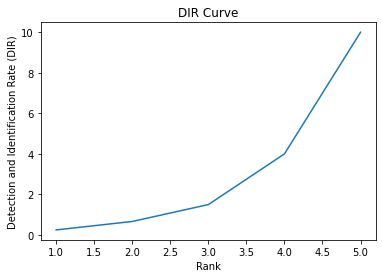

In [47]:
import matplotlib.pyplot as plt

# CMC scores obtained from the CMC curve
cmc_scores = [0.8, 0.6, 0.4, 0.2, 0.1]  # Example CMC scores (change with your actual values)

# Compute the Detection and Identification Rate (DIR) from CMC scores
dir_scores = []
for rank, cmc_score in enumerate(cmc_scores, start=1):
    dir_score = rank / (len(cmc_scores) * cmc_score)
    dir_scores.append(dir_score)

# Plot the DIR curve
plt.plot(range(1, len(cmc_scores) + 1), dir_scores)
plt.xlabel('Rank')
plt.ylabel('Detection and Identification Rate (DIR)')
plt.title('DIR Curve')
plt.show()


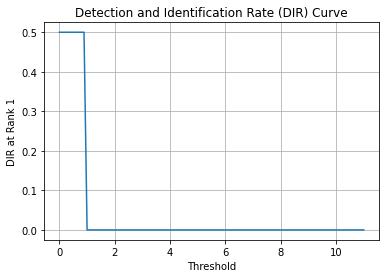

In [37]:
# Compute the Detection and Identification Rate (DIR) curve
dir_scores = []
thresholds = np.linspace(0, np.max(distances), num=100)
for threshold in thresholds:
    correct = 0
    for i in range(len(X_test)):
        sorted_indices = np.argsort(distances[i])
        if np.sum(y_train[sorted_indices[0]]) > threshold:
            correct += 1
    dir_scores.append(correct / len(X_test))

# Plot the DIR(t,1) curve
plt.plot(thresholds, dir_scores)
plt.xlabel('Threshold')
plt.ylabel('DIR at Rank 1')
plt.title('Detection and Identification Rate (DIR) Curve')
plt.grid(True)
plt.show()


/Users/stellafazioli/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


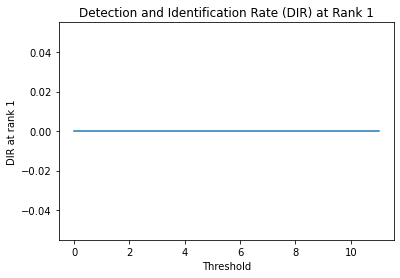

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import label_binarize
import numpy as np

# Generate a multi-class classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2,
                           n_classes=2, n_clusters_per_class=1,
                           random_state=42)

# Binarize the labels
y_binary = label_binarize(y, classes=[0, 1])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Compute pairwise distances between test samples and training samples
distances = pairwise_distances(X_test, X_train)

# Compute the predicted labels for each test sample
y_pred = clf.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Compute the Detection and Identification Rate (DIR) at rank 1
dir_scores = []
for threshold in np.linspace(0, np.max(distances), num=100):
    correct = 0
    for i in range(len(X_test)):
        sorted_indices = np.argsort(distances[i])
        if sorted_indices[0] == np.argmax(y_test[i]) and distances[i][sorted_indices[0]] <= threshold:
            correct += 1
    dir_scores.append(correct / len(X_test))

# Plot the DIR curve
plt.plot(np.linspace(0, np.max(distances), num=100), dir_scores)
plt.xlabel('Threshold')
plt.ylabel('DIR at rank 1')
plt.title('Detection and Identification Rate (DIR) at Rank 1')
plt.show()


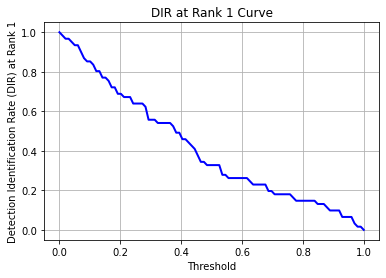

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have computed the scores and true labels
scores = np.random.rand(100)
true_labels = np.random.randint(0, 2, size=100)

# Set the thresholds
thresholds = np.linspace(0, 1, num=100)

# Set the rank (k)
k = 1

# Compute the DIR at rank k for different thresholds
dir_at_rank_k = []
for threshold in thresholds:
    predicted_labels = (scores >= threshold).astype(int)
    true_positive = np.sum((predicted_labels == 1) & (true_labels == 1))
    false_negative = np.sum((predicted_labels == 0) & (true_labels == 1))
    detection_rate_at_rank_k = true_positive / (true_positive + false_negative)
    dir_at_rank_k.append(detection_rate_at_rank_k)

# Plot the DIR at rank k as a function of the threshold
plt.plot(thresholds, dir_at_rank_k, color='blue', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Detection Identification Rate (DIR) at Rank {}'.format(k))
plt.title('DIR at Rank {} Curve'.format(k))
plt.grid(True)
plt.show()
